In [1]:
%load_ext autoreload
%autoreload 2

import json
from pathlib import Path
from itertools import chain

import numpy as np
import pandas as pd

# Preamble
We will use Datalad to manage our data, which in turn depends on git-annex. To install git-annex, uncomment and run one of the following:

In [2]:
# Debian
# apt-get install git-annex

In [3]:
# Linux with Conda
# conda install -y git-annex

In [4]:
# OSX
# open https://git-annex.branchable.com/install/OSX/

Datalad, Pybids, Nilearn are Python tools.
To ensure that everything installs correctly, we'll upgrade the [pip](https://pip.pypa.io/en/stable/) package manager
and the [setuptools](https://setuptools.readthedocs.io/en/latest/) utilities.

We will also install unreleased versions of Datalad, Pybids, and [Nilearn](https://nilearn.github.io/) to make things run a little more smoothly.

In [5]:
# ! pip install -q --upgrade pip setuptools
# ! pip install -q --upgrade datalad nistats pybids graphviz

In [6]:
# # get the dataset
# !export DATALAD_UI_PROGRESSBAR=log
# !export NO_COLOR="1"

# !datalad install -r ds000003-fmriprep/
# !datalad update ds000003_fmriprep

# !datalad install -r ds000003/
# !datalad update ds000003

In [7]:
# ! datalad get ds000003-fmriprep/sub-*/func/*_desc-confounds_*.tsv \
#               ds000003-fmriprep/sub-*/func/*_desc-confounds_*.json \
#               ds000003-fmriprep/dataset_description.json 

In [8]:
from nilearn.plotting import plot_design_matrix

import bids
from bids.modeling import BIDSStatsModelsGraph
from bids.layout import BIDSLayout


def api(obj):
    return {attr: getattr(obj, attr) for attr in dir(obj) if not attr[0] == '_'}

In [9]:
layout = BIDSLayout('./ds000003', derivatives='./ds000003-fmriprep')

In [10]:
json_file = 'model-001_smdl.json'
spec = json.loads(Path(json_file).read_text())
spec

{'Name': 'ds003_model001',
 'BIDSModelVersion': '1.0.0',
 'Description': '',
 'Input': {'task': 'rhymejudgment'},
 'Nodes': [{'Level': 'run',
   'Name': 'subject',
   'GroupBy': ['subject'],
   'Transformations': {'Transformer': 'pybids-transforms-v1',
    'Instructions': [{'Name': 'Factor', 'Input': ['trial_type']},
     {'Name': 'Convolve',
      'Input': ['trial_type.word', 'trial_type.pseudoword'],
      'Model': 'spm'}]},
   'Model': {'X': ['trial_type.word',
     'trial_type.pseudoword',
     'framewise_displacement',
     'trans_x',
     'trans_y',
     'trans_z',
     'rot_x',
     'rot_y',
     'rot_z',
     'a_comp_cor_00',
     'a_comp_cor_01',
     'a_comp_cor_02',
     'a_comp_cor_03',
     'a_comp_cor_04',
     'a_comp_cor_05',
     1]},
   'DummyContrasts': {'Conditions': ['trial_type.word',
     'trial_type.pseudoword'],
    'Test': 't'},
   'Contrasts': [{'Name': 'word_gt_pseudo',
     'ConditionList': ['trial_type.word', 'trial_type.pseudoword'],
     'Weights': [1, -

In [11]:
layout

BIDS Layout: ...el-zoo/exhibits/ds003/ds000003 | Subjects: 13 | Sessions: 0 | Runs: 0

In [12]:
graph = BIDSStatsModelsGraph(layout, spec)

In [13]:
root_node = graph.root_node

In [14]:
try:
    graph.load_collections()
except ValueError:
    graph.load_collections(scan_length=320)

In [30]:
collections = layout.get_collections('run', task='rhymejudgment', scan_length=320)

> /home/zorro/repos/pybids/bids/variables/io.py(302)_load_time_variables()
    300                     if select_on['subject'] == '01' and result:
    301                         import pdb; pdb.set_trace()
--> 302                     run.add_variable(var)
    303 
    304         # Process confound files

ipdb> !run.add_variable(var)
ipdb> !run.variables.keys()
dict_keys(['trial_type'])
ipdb> !run.variables['trial_type']
ipdb> !run.variables['trial_type'].values
0           word
1           word
2           word
3           word
4           word
         ...    
59    pseudoword
60    pseudoword
61    pseudoword
62    pseudoword
63    pseudoword
Name: trial_type, Length: 64, dtype: object
ipdb> !run.add_variable(var)
ipdb> !run.variables.keys()
dict_keys(['trial_type'])
ipdb> !run.variables['trial_type'].values
0           word
1           word
2           word
3           word
4           word
         ...    
59    pseudoword
60    pseudoword
61    pseudoword
62    pseudoword
63    

BdbQuit: 

In [16]:
root_node.get_collections()[-1].entities

{'desc': 'preproc',
 'space': 'MNI152NLin2009cAsym',
 'SkullStripped': True,
 'datatype': 'func',
 'TaskName': 'rhyme judgment',
 'suffix': 'bold',
 'task': 'rhymejudgment',
 'RepetitionTime': 2.0,
 'subject': '13',
 'model': 'zoo',
 'extension': '.nii.gz'}

In [17]:
# graph.load_collections(scan_length=320)

In [18]:
# foo = graph.root_node.get_collections()[0]

In [19]:
# [ff.run_info[0][0]['RepetitionTime'] for ff in list(foo.variables.values())]

In [20]:
# for ff in list(foo.variables.values()):
#     break

In [21]:
# ff.to_df()

In [22]:
specs = root_node.run(group_by=root_node.group_by)
len(specs)

13

In [23]:
specs[0]

<AxesSubplot:label='conditions', ylabel='scan number'>

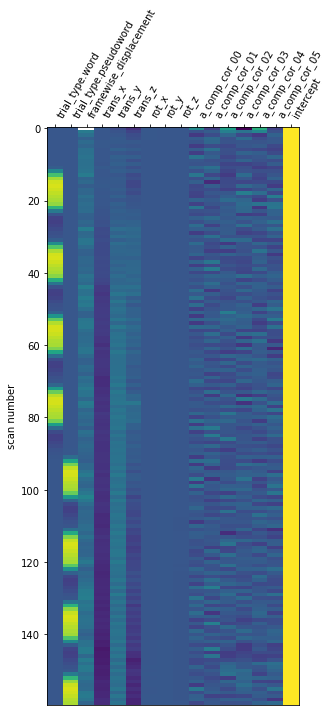

In [24]:
plot_design_matrix(specs[0].X, rescale=False)